In [16]:
import duckdb as db
import polars as pl
import pandas as pd
from pathlib import Path

In [40]:
parquet_file = Path("/home/sean/Projects/streambt/full_df_debug.pl.parquet")
full_df = pl.read_parquet(parquet_file).rename({'Date':'Date_index', 'Date_str':'Date'})

In [18]:

full_df.columns

['Date_index',
 'Ticker',
 'Adj Close',
 'Close',
 'Dividends',
 'High',
 'Low',
 'Open',
 'Stock Splits',
 'Volume',
 'Date',
 'entry_price',
 'exit_signal',
 'exit_point',
 'exit_price',
 'exit_gain_loss',
 'ema_close_12_wilder',
 'ema_close_26_wilder',
 'macd',
 'cap_xchgd_approx',
 '_close_prev',
 '_trh',
 '_trl',
 '_ad',
 'ema_ad',
 'ema_volume',
 'TMF_w',
 'TMF_4w_min',
 'TMF_26w_min',
 'TMF_4w_min_dd',
 'TMF_26w_min_dd',
 '__TMF_4w_min_dd_qtl_50_neg',
 '__TMF_26w_min_dd_qtl_50_neg',
 'TMF_4w_min_dd_qtl_50',
 'TMF_4w_min_dd_qtl_50_alt',
 'TMF_26w_min_dd_qtl_50',
 'TMF_26w_min_dd_qtl_50_alt',
 '_chg',
 '_avg_gain',
 '_avg_loss',
 'rsi_ema',
 '_ma_avg_gain',
 '_ma_avg_loss',
 'rsi',
 'TMF_Simple_Signal',
 'up',
 'dn',
 'PDI',
 'NDI',
 'ADX',
 'ATR',
 'st_upper',
 'st_lower',
 'previous_exit_success',
 'previous_exit_fail',
 'previous_exit_result_ratio']

# sample data

In [41]:
df = full_df.filter(pl.col('Ticker')=='CBA.AX').to_pandas()
df['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
6376   2025-01-22
6377   2025-01-23
6378   2025-01-24
6379   2025-01-28
6380   2025-01-29
Name: Date, Length: 6381, dtype: datetime64[ns]

# check tmf

               TMF_w  TMF_4w_min  TMF_26w_min
Date                                         
2000-05-22  0.154019   -0.013406          NaN
2000-05-23  0.159023   -0.013406          NaN
2000-05-24  0.186422   -0.013406          NaN
2000-05-25  0.094497   -0.013406          NaN
2000-05-26  0.134006   -0.013406          NaN
...              ...         ...          ...
2003-10-27 -0.263031   -0.263031     -0.43057
2003-10-28 -0.310001   -0.310001     -0.43057
2003-10-29 -0.270182   -0.310001     -0.43057
2003-10-30 -0.230169   -0.310001     -0.43057
2003-10-31 -0.238852   -0.310001     -0.43057

[900 rows x 3 columns]


<Axes: xlabel='Date'>

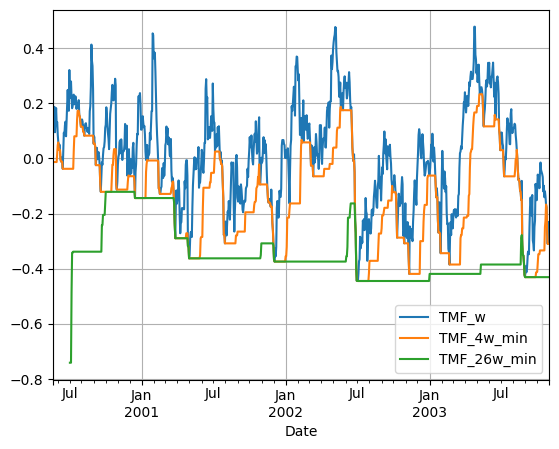

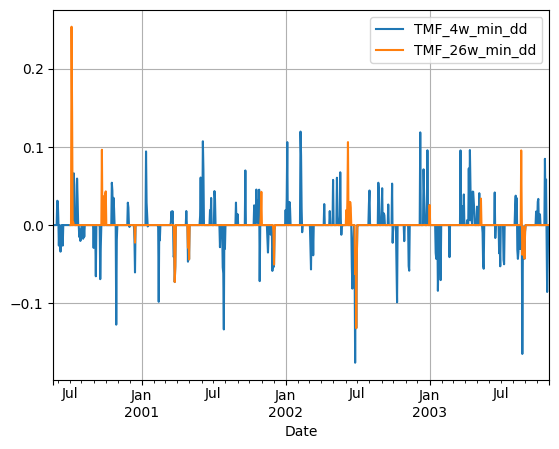

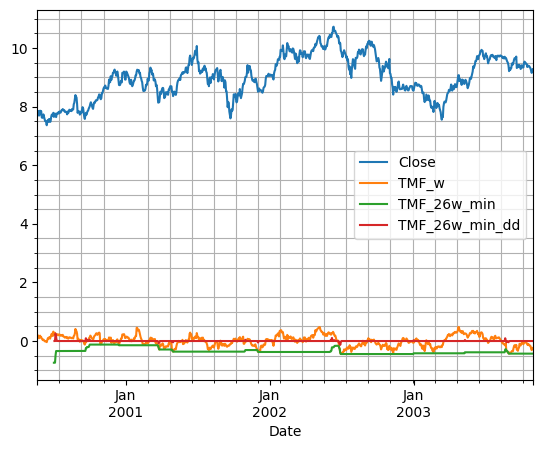

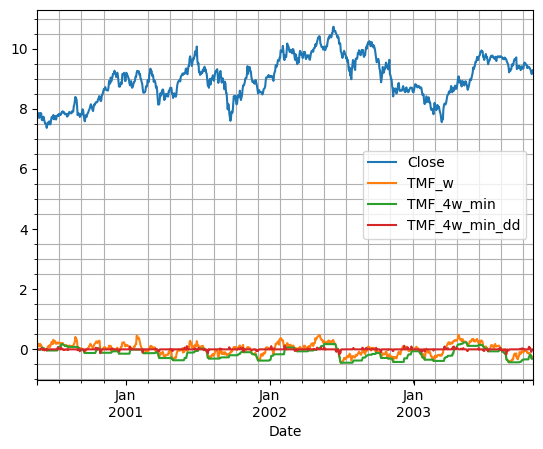

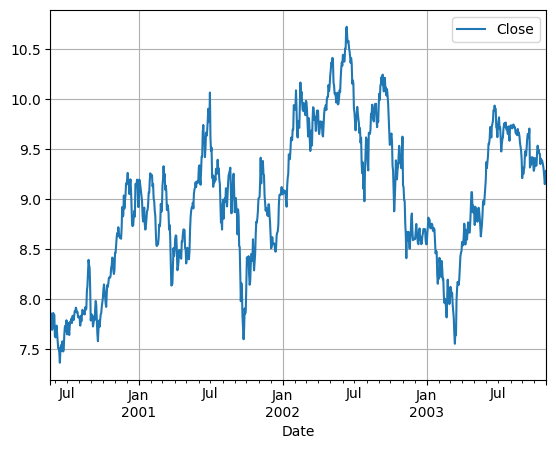

In [20]:
s,e = 100,1000

#focus = df[['Date','TMF_w','TMF_wa',"TMF_4w_min","TMF_8w_min","TMF_26w_min"]].iloc[s:e]
focus = df[['Date','TMF_w',"TMF_4w_min","TMF_26w_min"]].iloc[s:e].set_index('Date')
print(focus)
focus.plot(grid=True,sharey=False)#,subplots=True)
#focus = df[['Date','macd','macd_wa','macd_signal','macd_signal_wa']].iloc[s:e]
#focus.plot(grid=True,sharey=False)#,subplots=True)

focus = df[['Date',"TMF_4w_min_dd", "TMF_26w_min_dd"]].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)

focus = df[['Date','Close', 'TMF_w',"TMF_26w_min","TMF_26w_min_dd"]].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')


focus = df[['Date','Close', 'TMF_w',"TMF_4w_min","TMF_4w_min_dd"]].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(focus)

focus = df[['Date','Close']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)



# check adx

In [21]:
#df[['DX', 'ADX']]

In [22]:
#df[['DX']].ewm(com=14-1).mean()

                 PDI       NDI
Date                          
2023-02-08  0.304935  0.174643
2023-02-09  0.295108  0.209087
2023-02-10  0.276403  0.197999
2023-02-13  0.252828  0.218793
2023-02-14  0.269360  0.202445
...              ...       ...
2024-08-30  0.391361  0.171055
2024-09-02  0.420971  0.153549
2024-09-03  0.445365  0.143097
2024-09-04  0.383588  0.201619
2024-09-05  0.380984  0.195248

[400 rows x 2 columns]


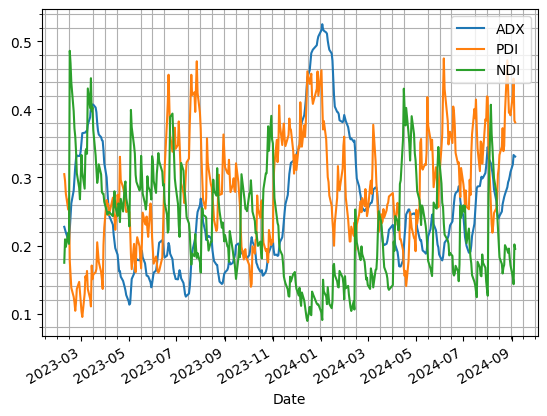

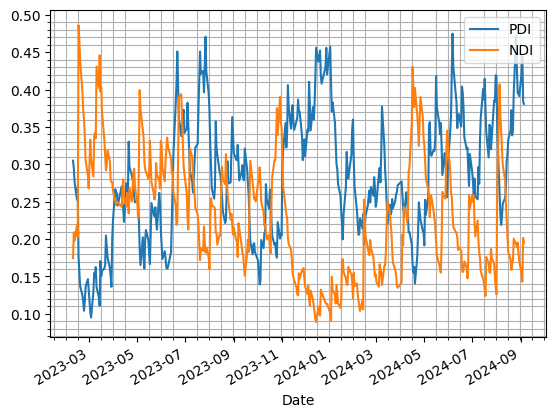

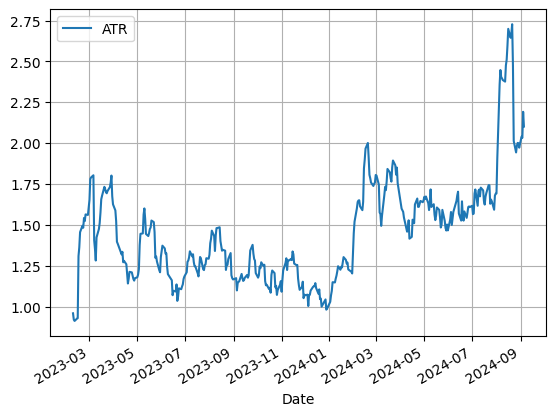

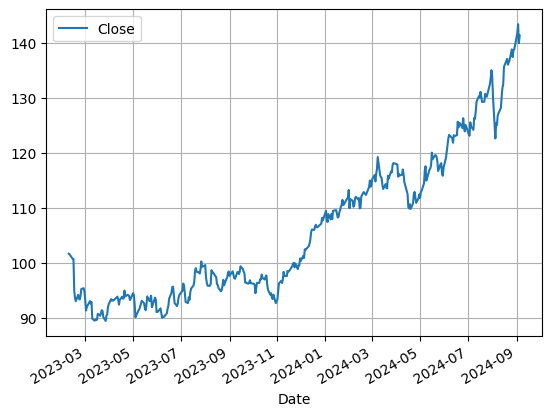

In [23]:
#s,e = -340,-330
s,e = -500,-100

focus = df[['Date', 'ADX',"PDI","NDI"]].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date',"PDI","NDI"]].iloc[s:e].set_index('Date')
#focus['test'] =  (focus['PDI']-focus['NDI']).abs()/(focus['PDI']+focus['NDI']).abs()
print(focus)
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

#focus = df[['Date','DX', "ADX"]].iloc[s:e].set_index('Date')
##focus['test'] =  (focus['PDI']-focus['NDI']).abs()/(focus['PDI']+focus['NDI']).abs()
#print(focus)
#ax = focus.plot(grid=True,sharey=False)#,subplots=True)
#ax.minorticks_on()
#ax.grid(which='both')

focus = df[['Date','ATR']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date','Close']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')



# check supertrend

In [24]:
df.columns

Index(['Date_index', 'Ticker', 'Adj Close', 'Close', 'Dividends', 'High',
       'Low', 'Open', 'Stock Splits', 'Volume', 'Date', 'entry_price',
       'exit_signal', 'exit_point', 'exit_price', 'exit_gain_loss',
       'ema_close_12_wilder', 'ema_close_26_wilder', 'macd',
       'cap_xchgd_approx', '_close_prev', '_trh', '_trl', '_ad', 'ema_ad',
       'ema_volume', 'TMF_w', 'TMF_4w_min', 'TMF_26w_min', 'TMF_4w_min_dd',
       'TMF_26w_min_dd', '__TMF_4w_min_dd_qtl_50_neg',
       '__TMF_26w_min_dd_qtl_50_neg', 'TMF_4w_min_dd_qtl_50',
       'TMF_4w_min_dd_qtl_50_alt', 'TMF_26w_min_dd_qtl_50',
       'TMF_26w_min_dd_qtl_50_alt', '_chg', '_avg_gain', '_avg_loss',
       'rsi_ema', '_ma_avg_gain', '_ma_avg_loss', 'rsi', 'TMF_Simple_Signal',
       'up', 'dn', 'PDI', 'NDI', 'ADX', 'ATR', 'st_upper', 'st_lower',
       'previous_exit_success', 'previous_exit_fail',
       'previous_exit_result_ratio'],
      dtype='object')

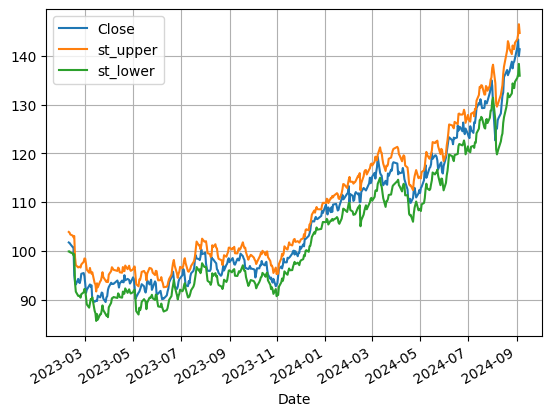

In [27]:
#s,e = -340,-330
s,e = -500, -100

focus = df[['Date','Close', 'st_upper', 'st_lower']].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')



In [39]:
df['ATR']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6376   NaN
6377   NaN
6378   NaN
6379   NaN
6380   NaN
Name: ATR, Length: 6381, dtype: float64

In [49]:
def supertrend(df, atr_multiplier=3):
    # Calculate the Upper Band(UB) and the Lower Band(LB)
    # Formular: Supertrend =(High+Low)/2 + (Multiplier)∗(ATR)
    current_average_high_low = (df['High']+df['Low'])/2
#    df['atr'] = ta.atr(df['high'], df['low'], df['close'], period=15)
    df['atr'] = df['ATR']
    #df.dropna(inplace=True)
    df['basicUpperband'] = current_average_high_low + (atr_multiplier * df['atr'])
    df['basicLowerband'] = current_average_high_low - (atr_multiplier * df['atr'])
    first_upperBand_value = df['basicUpperband'].iloc[0]
    first_lowerBand_value = df['basicLowerband'].iloc[0]
    upperBand = [first_upperBand_value]
    lowerBand = [first_lowerBand_value]
    
    st = [True] * len(df)
    for i in range(1, len(df)):
        if df['Close'].iloc[i] > upperBand[i-1]:
            st[i] = 1
        # if current close price crosses below lowerband
        elif df['Close'].iloc[i] < lowerBand[i-1]:
            st[i] = -1
        # else, the trend continues
        else:
            st[i] = st[i-1]

        if df['basicUpperband'].iloc[i] < upperBand[i-1] or df['Close'].iloc[i-1] > upperBand[i-1]:
            upperBand.append(df['basicUpperband'].iloc[i])
        else:
            upperBand.append(upperBand[i-1])

        if df['basicLowerband'].iloc[i] > lowerBand[i-1] or df['Close'].iloc[i-1] < lowerBand[i-1]:
            lowerBand.append(df['basicLowerband'].iloc[i])
        else:
            lowerBand.append(lowerBand[i-1])

    df['upperband'] = upperBand
    df['lowerband'] = lowerBand
    df['direction'] = st
    df.drop(['basicUpperband', 'basicLowerband',], axis=1, inplace=True)
    return df

In [63]:
df = supertrend(df,atr_multiplier=2)

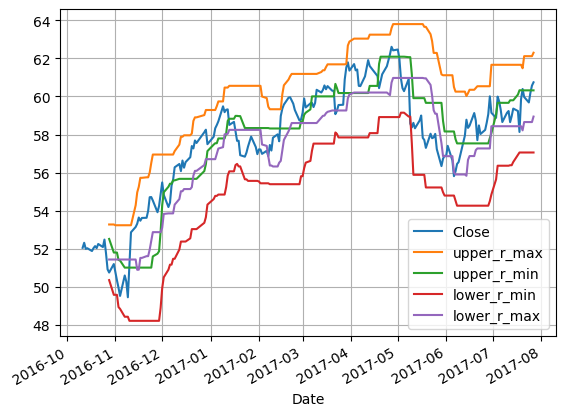

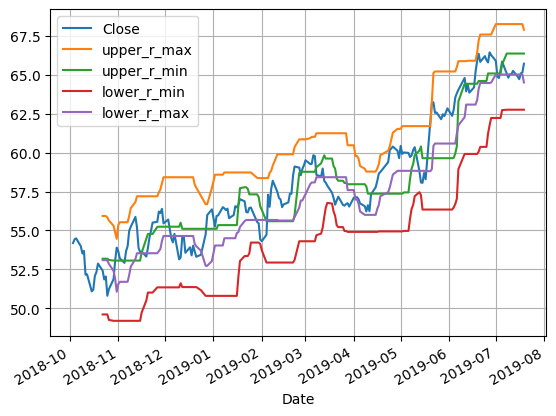

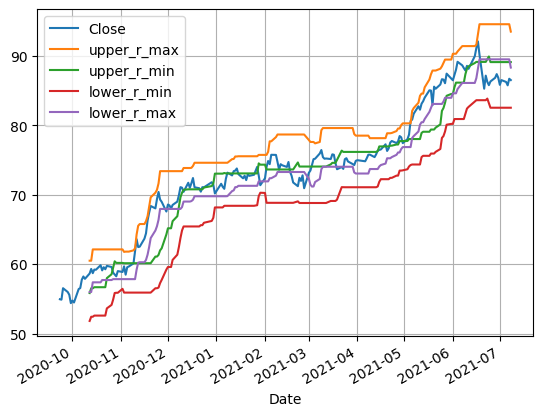

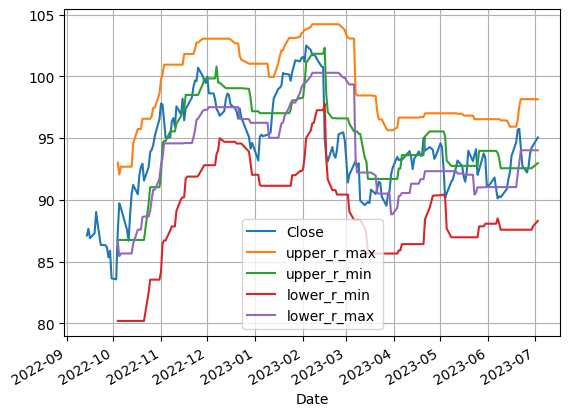

In [116]:
#s,e = -340,-330
for i in [-2100,-1600,-1100,-600]:
    s,e = i, i+200#-2000, -100

    focus = df[['Date','Close', 'upperband', 'lowerband', 'direction', 'st_upper', 'st_lower']].iloc[s:e].set_index('Date')
    focus['upper_r_max'] = focus['st_upper'].rolling(14).max()
    focus['upper_r_min'] = focus['st_upper'].rolling(14).min()

    focus['lower_r_min'] = focus['st_lower'].rolling(14).min()
    focus['lower_r_max'] = focus['st_lower'].rolling(14).max()


    focus['dir over'] = focus['Close']+focus['direction']*5
    #focus['dir over alt'] = None
    #focus['dir over alt'][focus['Close']>focus['upper_r_min']] = focus['dir over']
    #focus['dir over alt'][focus['Close']<focus['lower_r_max']] = focus['dir over']

    focus = focus.drop(columns = ['direction'])
    focus = focus.drop(columns = ['dir over'])
    focus = focus.drop(columns = ['upperband','lowerband'])
    
    #focus = focus.drop(columns = ['upper_alt','lower_alt'])
    #focus = focus.drop(columns = ['Close'])
    focus = focus.drop(columns = ['st_upper','st_lower'])


    focus.plot(grid=True,sharey=False)#,subplots=True)
    ax.minorticks_on()
    ax.grid(which='both')


    #focus = df[['Date','Close', 'direction']].iloc[s:e].set_index('Date')


# check atr

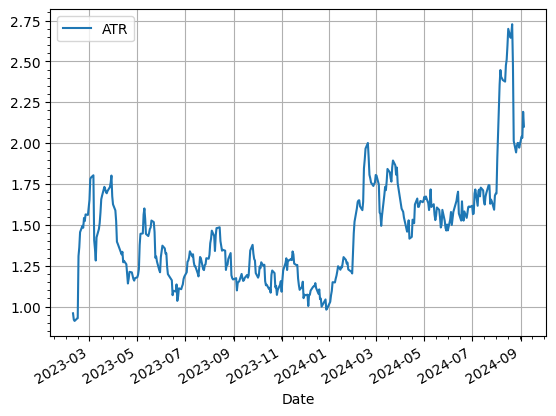

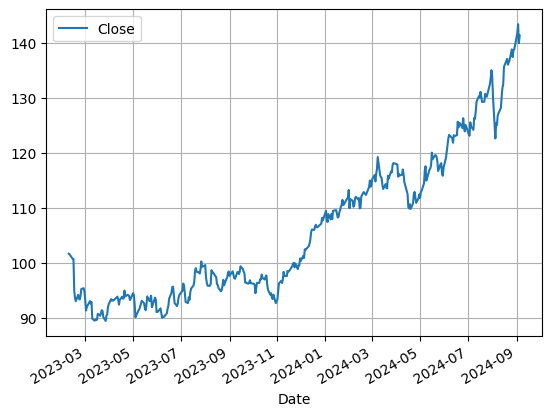

In [26]:
#s,e = -340,-330
s,e = -500,-100

focus = df[['Date', 'ATR']].iloc[s:e].set_index('Date')
ax = focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

focus = df[['Date','Close', ]].iloc[s:e].set_index('Date')
focus.plot(grid=True,sharey=False)#,subplots=True)
ax.minorticks_on()
ax.grid(which='both')

